# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

weather_api_key= "f681a646d946b6de4d62423be980f0a1"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"
city_url = f"{url}&q=adana"
city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': 35.2881, 'lat': 36.985}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.22, 'feels_like': 75.69, 'temp_min': 75.22, 'temp_max': 75.72, 'pressure': 1007, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1716654763, 'sys': {'type': 1, 'id': 6946, 'country': 'TR', 'sunrise': 1716603843, 'sunset': 1716655674}, 'timezone': 10800, 'id': 325361, 'name': 'Adana Province', 'cod': 200}


In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       
        time.sleep(3)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | tralee
Processing Record 3 of Set 1 | weno
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | labytnangi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kabansk
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | salahonda
Processing Record 13 of Set 1 | isla vista
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | holualoa
Processing Record 16 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 17 of Set 1 | dawesville
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | sasovo
Processing Record 20 of Set 1 | beitbridge
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing

Processing Record 40 of Set 4 | mcminnville
Processing Record 41 of Set 4 | smarhon
Processing Record 42 of Set 4 | napier
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | santa rita
Processing Record 46 of Set 4 | carolina
Processing Record 47 of Set 4 | inirida
Processing Record 48 of Set 4 | colonel hill
Processing Record 49 of Set 4 | tazacorte
Processing Record 0 of Set 5 | anadyr
Processing Record 1 of Set 5 | timimoun
Processing Record 2 of Set 5 | kelaat mgouna
City not found. Skipping...
Processing Record 3 of Set 5 | xiantao
Processing Record 4 of Set 5 | praia da vitoria
Processing Record 5 of Set 5 | marand
Processing Record 6 of Set 5 | san luis de la loma
Processing Record 7 of Set 5 | grand-bassam
Processing Record 8 of Set 5 | bac lieu
Processing Record 9 of Set 5 | machico
Processing Record 10 of Set 5 | udachny
Processing Record 11 of Set 5 | china
Processing Record 12 of Set 5 | gur

Processing Record 25 of Set 8 | tofol
Processing Record 26 of Set 8 | ulladulla
Processing Record 27 of Set 8 | madaba
Processing Record 28 of Set 8 | kollegal
Processing Record 29 of Set 8 | worland
Processing Record 30 of Set 8 | nema
Processing Record 31 of Set 8 | kerikeri
Processing Record 32 of Set 8 | merizo village
Processing Record 33 of Set 8 | kizel
Processing Record 34 of Set 8 | papao
Processing Record 35 of Set 8 | melendugno
Processing Record 36 of Set 8 | kayangel
Processing Record 37 of Set 8 | letlhakane
Processing Record 38 of Set 8 | vecumnieki
Processing Record 39 of Set 8 | i-n-salah
Processing Record 40 of Set 8 | nova vicosa
Processing Record 41 of Set 8 | dukhan
Processing Record 42 of Set 8 | kilindoni
Processing Record 43 of Set 8 | kirensk
Processing Record 44 of Set 8 | hayma'
City not found. Skipping...
Processing Record 45 of Set 8 | pacific grove
Processing Record 46 of Set 8 | candido mendes
Processing Record 47 of Set 8 | san rafael del sur
Processing 

Processing Record 12 of Set 12 | port antonio
Processing Record 13 of Set 12 | paracho de verduzco
Processing Record 14 of Set 12 | copparo
Processing Record 15 of Set 12 | imperial
Processing Record 16 of Set 12 | garachico
Processing Record 17 of Set 12 | eyl
Processing Record 18 of Set 12 | sindi
Processing Record 19 of Set 12 | banda aceh
Processing Record 20 of Set 12 | muhammadabad
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count


<bound method DataFrame.count of              City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    longyearbyen  78.2186   15.6401     30.04        80          75   
1          tralee  52.2704   -9.7026     55.65        82         100   
2            weno   7.4515  151.8468     84.22        81          20   
3       grytviken -54.2811  -36.5092     19.15        80          15   
4      labytnangi  66.6572   66.4183     32.38        98          57   
..            ...      ...       ...       ...       ...         ...   
533     garachico  28.7781  -17.7646     69.91        64          20   
534           eyl   7.9803   49.8164     83.84        78          41   
535         sindi  20.8000   78.8667     94.08        27          97   
536    banda aceh   5.5577   95.3222     82.38        75         100   
537  muhammadabad  25.6333   83.7500     98.31        25          24   

     Wind Speed Country        Date  
0         23.02      SJ  1716656846  
1         11.50      IE  1

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,30.04,80,75,23.02,SJ,1716656846
1,tralee,52.2704,-9.7026,55.65,82,100,11.50,IE,1716656849
2,weno,7.4515,151.8468,84.22,81,20,18.70,FM,1716656852
3,grytviken,-54.2811,-36.5092,19.15,80,15,7.47,GS,1716656855
4,labytnangi,66.6572,66.4183,32.38,98,57,12.68,RU,1716656858


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv") #, index_col="City_ID")
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

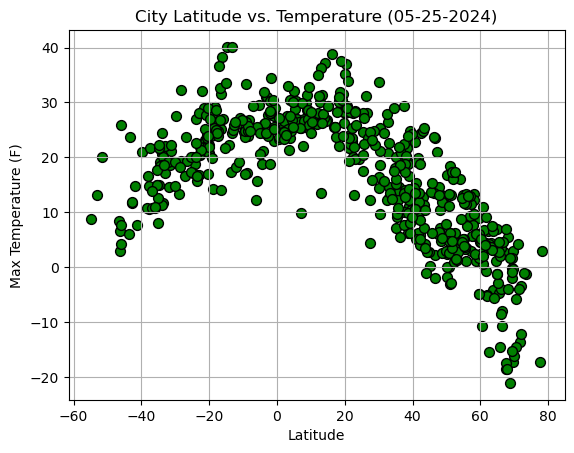

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="green",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

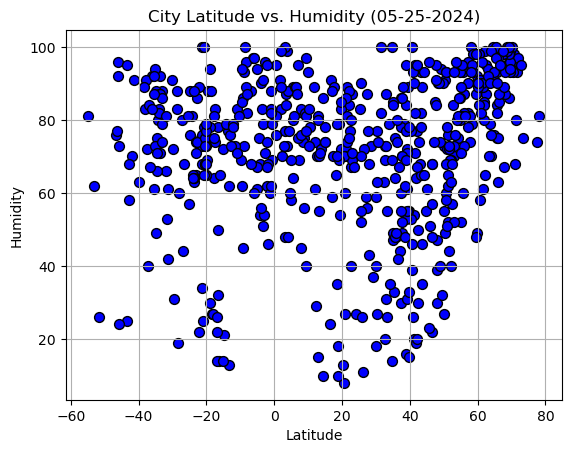

In [21]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="blue",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure


#### Latitude Vs. Cloudiness

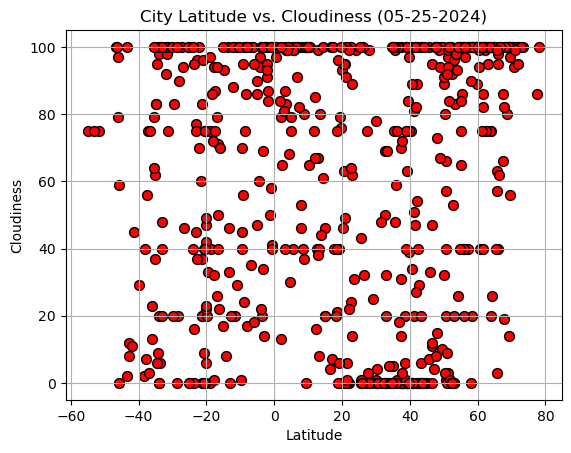

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="red",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE


#### Latitude vs. Wind Speed Plot

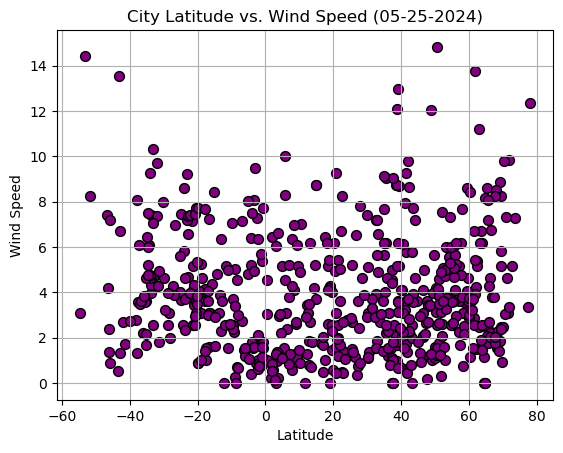

In [26]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="purple",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    
    (slope,intercept, rvalue, pvalue, stderr) = linregress(x_value, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434125


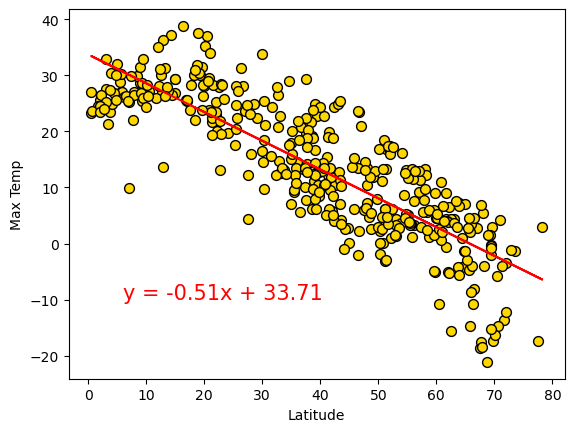

In [36]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp", (6,-10), "gold")

The r-value is: 0.4121057168607252


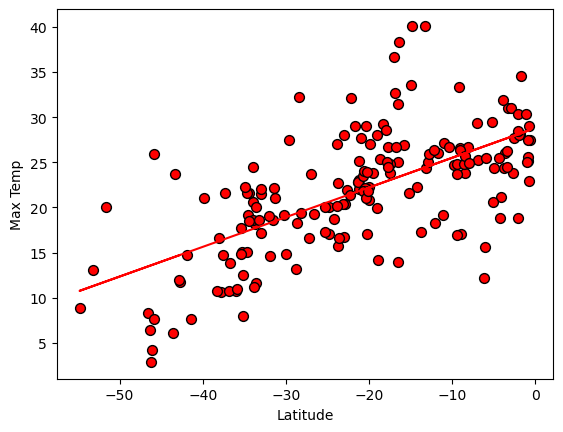

In [38]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp", (6,-10), "red")

**Discussion about the linear relationship:** There is a definite relationship between temperature and latitude. There is a stronger relationship closer to the equator the city is loacation. What isinteresting is that there is a higher r-value for the northern hemishpere versus the southern hemishere. Intheory they should be just about the same, but maybe there wer more cities closer to the eaquator inthe northern hemisphere and more cities further to the south in the southern hemisphere list.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789608


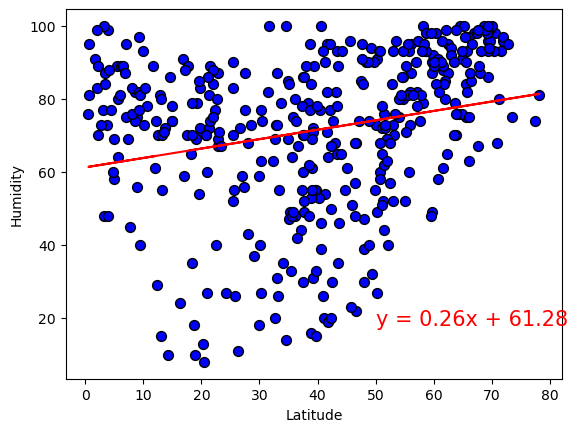

In [42]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (50,18), "blue")

The r-value is: 0.0002808747046324618


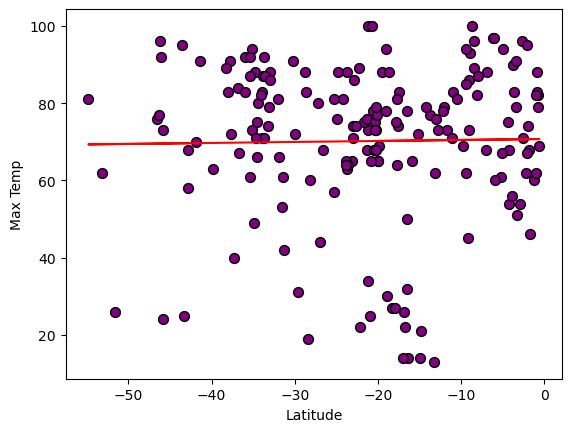

In [44]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Max Temp", (50,18), "purple")

**Discussion about the linear relationship:** unlike the temperature there does not appear to be a relationship between latitude and humidity i the northern or southern hemisphere.  Thd r-values also add to this view.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811043


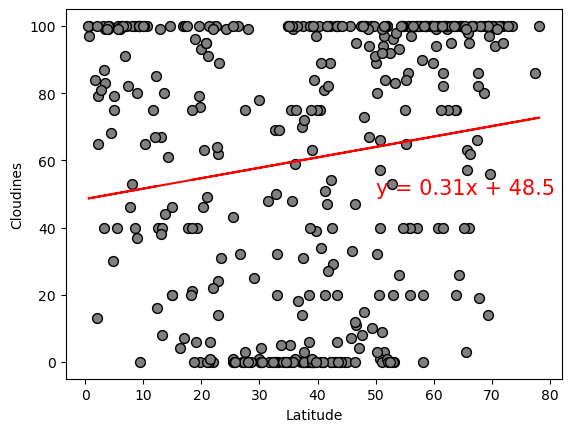

In [45]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudines", (50,50), "gray")

The r-value is: 0.020567354299943663


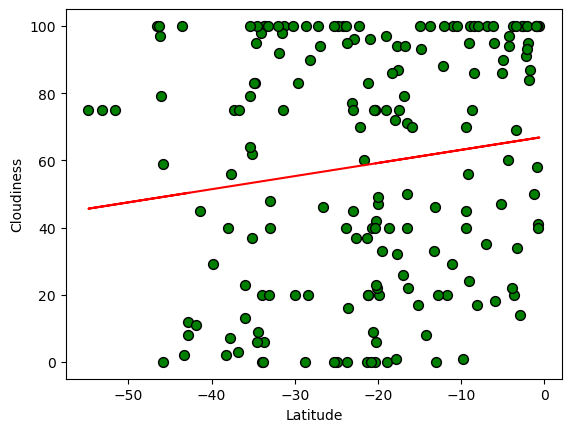

In [46]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (50,50), "green")

**Discussion about the linear relationship:** Despite the r-value being a little more notable, there does not appear to be relationship bewteen latitude and cloudiness in the northern or southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449474


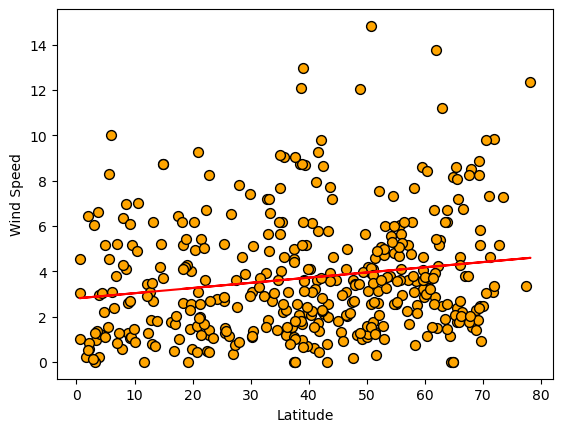

In [47]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (50, 35), "orange")

The r-value is: 0.06223904070051575


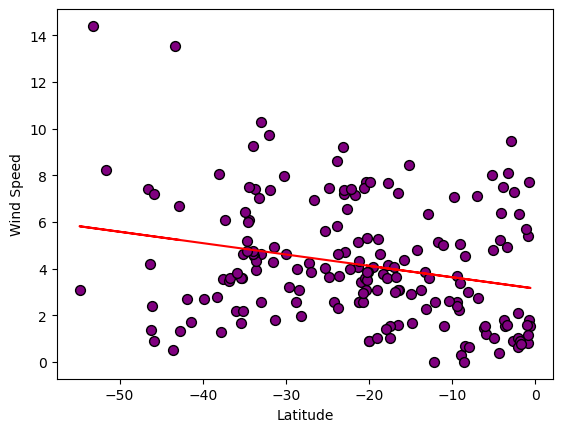

In [48]:
# Southern Hemisphere
# YOUR CODEsou
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (-30,30), "purple")

**Discussion about the linear relationship:** As with the previous two areas there still appears to be no relationship between latitude and wind speed in the northern or southern hemisphere.